In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix

In [3]:
np.set_printoptions(linewidth=120)

In [5]:
targets = pd.read_csv('../data/train.csv').set_index('image_id').sort_index()

In [7]:
targets.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [10]:
targets.describe()

,isup_grade
count,10616.000000
mean,1.902223
std,1.719537
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [11]:
((targets.isup_grade - targets.isup_grade.mean()) / targets.isup_grade.std()).describe()

count    1.061600e+04
mean     2.944977e-17
std      1.000000e+00
min     -1.106241e+00
25%     -1.106241e+00
50%     -5.246896e-01
75%      6.384143e-01
max      1.801518e+00
Name: isup_grade, dtype: float64

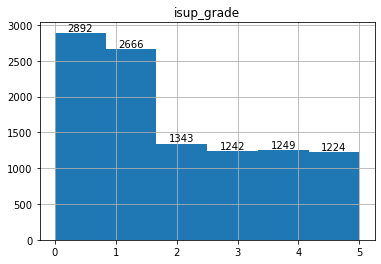

In [12]:
targets.hist(bins=6)
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(),
            '{}'.format(int(p.get_height())),
            ha='center',
            va='bottom');

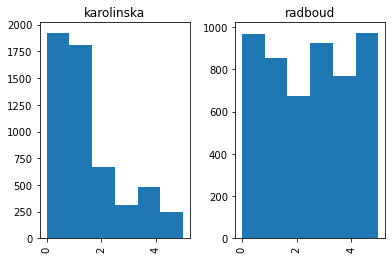

In [13]:
targets.hist(column='isup_grade', by='data_provider', bins=6);

In [14]:
targets.isup_grade.value_counts(normalize=True, sort=False)

0    0.272419
1    0.251130
2    0.126507
3    0.116993
4    0.117653
5    0.115298
Name: isup_grade, dtype: float64

In [15]:
targets.data_provider.unique()

array(['karolinska', 'radboud'], dtype=object)